---
# **Cài đặt xldr 1.2.0 (mở tập tin Excel)**
---

In [ ]:
#--------------------------------------------------------------------
# Kết thúc session hiện hành: 
#    Top-right corner menu: Manage sessions > Terminate
#-------------------------------------------------------------------- 

In [ ]:
# Install xlrd phiên bản 1.2.0 trở về sau để có thể mở tập tin Excel
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


---
# **Kết nối Google Drive**
---

In [ ]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Chỉ định thư mục làm việc hiện hành
import os
colab_dir = '/content/gdrive/My Drive/Colab Notebooks/Máy học/Olist'
my_dir    = '/Lap trinh phan tich DL/Thuc hanh'
path      = colab_dir 

# Chuyển thư mục hiện hành
%cd $path 

/content/gdrive/My Drive/Colab Notebooks/Máy học/Olist


In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Nhập dữ liệu**

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [ ]:
# Reading data from all tables in the dataset

customers_df = pd.read_csv('olist_customers_dataset.csv')
items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
category_translation_df = pd.read_csv('product_category_name_translation.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
payments_df = pd.read_csv('olist_order_payments_dataset.csv')

In [ ]:
# Merging all dataframes
merged_df = orders_df.merge(items_df, on='order_id')
merged_df = merged_df.merge(payments_df, on='order_id')
merged_df = merged_df.merge(products_df, on='product_id')
merged_df = merged_df.merge(customers_df, on='customer_id')
merged_df = merged_df.merge(category_translation_df, on='product_category_name')

In [ ]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,housewares


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115878 entries, 0 to 115877
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115878 non-null  object 
 1   customer_id                    115878 non-null  object 
 2   order_status                   115878 non-null  object 
 3   order_purchase_timestamp       115878 non-null  object 
 4   order_approved_at              115864 non-null  object 
 5   order_delivered_carrier_date   114673 non-null  object 
 6   order_delivered_customer_date  113383 non-null  object 
 7   order_estimated_delivery_date  115878 non-null  object 
 8   order_item_id                  115878 non-null  int64  
 9   product_id                     115878 non-null  object 
 10  seller_id                      115878 non-null  object 
 11  shipping_limit_date            115878 non-null  object 
 12  price                         

In [ ]:
#convert column that relate to date to 1 type - datetime dtype
date_feature=['order_purchase_timestamp','order_approved_at','order_delivered_\
carrier_date','order_delivered_customer_date','order_estimated_delivery_date',\
'shipping_limit_date' ]
for i in date_feature:
  merged_df[i]=pd.to_datetime(merged_df[i],errors ='raise', utc = False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115878 entries, 0 to 115877
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115878 non-null  object        
 1   customer_id                    115878 non-null  object        
 2   order_status                   115878 non-null  object        
 3   order_purchase_timestamp       115878 non-null  datetime64[ns]
 4   order_approved_at              115864 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114673 non-null  datetime64[ns]
 6   order_delivered_customer_date  113383 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115878 non-null  datetime64[ns]
 8   order_item_id                  115878 non-null  int64         
 9   product_id                     115878 non-null  object        
 10  seller_id                      115878 non-null  object        
 11  

In [ ]:
rfm_df = merged_df[['customer_unique_id', 'order_id','product_category_name_english','price',\
                    'freight_value','payment_type','order_status','order_purchase_timestamp',\
                    'customer_state','payment_value'   ]]
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115878 entries, 0 to 115877
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             115878 non-null  object        
 1   order_id                       115878 non-null  object        
 2   product_category_name_english  115878 non-null  object        
 3   price                          115878 non-null  float64       
 4   freight_value                  115878 non-null  float64       
 5   payment_type                   115878 non-null  object        
 6   order_status                   115878 non-null  object        
 7   order_purchase_timestamp       115878 non-null  datetime64[ns]
 8   customer_state                 115878 non-null  object        
 9   payment_value                  115878 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.7+ MB


In [ ]:
rfm_df=rfm_df[rfm_df['order_status'] =='delivered']

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113384 entries, 0 to 115877
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             113384 non-null  object        
 1   order_id                       113384 non-null  object        
 2   product_category_name_english  113384 non-null  object        
 3   price                          113384 non-null  float64       
 4   freight_value                  113384 non-null  float64       
 5   payment_type                   113384 non-null  object        
 6   order_status                   113384 non-null  object        
 7   order_purchase_timestamp       113384 non-null  datetime64[ns]
 8   customer_state                 113384 non-null  object        
 9   payment_value                  113384 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.5+ MB


#EDA

In [ ]:
##------------------------------------------------------------------------------
## Thư viện
##------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import scipy.stats       as st
import seaborn           as sbn
import plotly.express    as px
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

from IPython.display         import Image
from sklearn                 import linear_model, svm, tree
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, mean_squared_error, precision_score, f1_score, recall_score#, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import BernoulliNB, GaussianNB
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from scipy.cluster          import hierarchy
from scipy.spatial.distance import cdist
from sklearn.cluster        import KMeans, AgglomerativeClustering
from sklearn.preprocessing  import MinMaxScaler, StandardScaler

import statsmodels.api   as sm
from statsmodels.formula.api     import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import scipy.stats as stats

##số lượng sản phẩm trong mỗi đơn hàng

In [ ]:
prod_gb1 = rfm_df.groupby(by = ['order_id'])['price'].count().reset_index()

In [ ]:
prod_gb1.columns = ['order_id', 'Prod Quantity']

In [ ]:
display(prod_gb1.sort_values(by = 'Prod Quantity', ascending = False))

,order_id,Prod Quantity
50511,895ab968e7bb0d5659d16cd74cd1650c,63
94085,fedcd9f7ccdc8cba3a18defedd1a5547,38
75683,ccf804e764ed5650cd8759557269dc13,26
25963,465c2e1bee4561cb39e0db8c5993aafc,24
60009,a3725dfe487d359b5be08cac48b64ec5,24
...,...,...
33771,5bd04e944fbdeb94cb04e86654501cfb,1
33770,5bcf5ca118d9e81440bf98e26c943255,1
33769,5bcde4ca8f0878aab60dc18cc310fa4d,1
33767,5bcc0d98a5287486bbe51150e6ed90f9,1


In [ ]:
prod_gb2 = pd.DataFrame(rfm_df.groupby(["order_id"], as_index = False).agg({"price":"nunique"}))

In [ ]:
prod_gb2.columns = ['order_id', 'Unique Prod']

In [ ]:
display(prod_gb2.sort_values(by = 'Unique Prod', ascending = False))

,order_id,Unique Prod
74659,ca3625898fbd48669d50701aba51cd5f,7
76627,cf5c8d9f52807cb2d2f0a0ff54c478da,6
33240,5a3b1c29a49756e75f1ef513383c0c12,6
66412,b436eb981676e54c0bc9bcade0e079c4,5
78830,d5211af24819d319c02a285e7bb51750,5
...,...,...
31870,565a27fae0aca550060e0f90a54495ef,1
31869,5659543f2c384877607595dab0690d5d,1
31868,565923f847aad52e7638eb189cce3b51,1
31866,5658e0069bd2fa9423e4d9d94469b7c3,1


In [ ]:
result1 = pd.merge(prod_gb1, prod_gb2, on = 'order_id')

In [ ]:
display(result1)

,order_id,Prod Quantity,Unique Prod
0,00010242fe8c5a6d1ba2dd792cb16214,1,1
1,00018f77f2f0320c557190d7a144bdd3,1,1
2,000229ec398224ef6ca0657da4fc703e,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1
...,...,...,...
94483,fffc94f6ce00a00581880bf54a75a037,1,1
94484,fffcd46ef2263f404302a634eb57f7eb,1,1
94485,fffce4705a9662cd70adb13d4a31832d,1,1
94486,fffe18544ffabc95dfada21779c9644f,1,1


In [ ]:
display(result1.sort_values(by = 'Prod Quantity', ascending = False).head(10))

,order_id,Prod Quantity,Unique Prod
50511,895ab968e7bb0d5659d16cd74cd1650c,63,2
94085,fedcd9f7ccdc8cba3a18defedd1a5547,38,1
75683,ccf804e764ed5650cd8759557269dc13,26,1
25963,465c2e1bee4561cb39e0db8c5993aafc,24,1
60009,a3725dfe487d359b5be08cac48b64ec5,24,1
40342,6d58638e32674bebee793a47ac4cbadc,24,1
38585,68986e4324f6a21481df4e6e89abcf01,24,2
73224,c6492b842ac190db807c15aff21a7dd6,24,1
14802,285c2e15bebd4ac83635ccc563dc71f4,22,1
33240,5a3b1c29a49756e75f1ef513383c0c12,22,6


In [ ]:
prod_tb1 = pd.DataFrame(index=sorted(result1['Prod Quantity'].unique().tolist()))
prod_tb1['NumofProd'] = prod_tb1.index
prod_gb11 = result1.groupby('Prod Quantity')['Prod Quantity'].count()
prod_tb1['Amount'] = prod_gb11

In [ ]:
display(prod_tb1)

,NumofProd,Amount
1,1,82128
2,2,9413
3,3,1485
4,4,790
5,5,231
6,6,268
7,7,46
8,8,39
9,9,11
10,10,14


In [ ]:
prod_tb2 = pd.DataFrame(index=sorted(result1['Unique Prod'].unique().tolist()))
prod_tb2['NumofProd'] = prod_tb2.index
prod_gb11 = result1.groupby('Unique Prod')['Unique Prod'].count()
prod_tb2['Amount'] = prod_gb11

In [ ]:
display(prod_tb2)

,NumofProd,Amount
1,1,92194
2,2,2120
3,3,150
4,4,17
5,5,4
6,6,2
7,7,1


##số lượng đơn hàng của mỗi KH

In [ ]:
ord_gb2 = pd.DataFrame(rfm_df.groupby(["customer_unique_id"], as_index = False).agg({"order_id":"nunique"}))

In [ ]:
ord_tb1 = pd.DataFrame(index=sorted(ord_gb2.order_id.unique().tolist()))
ord_gb2 = ord_gb2.groupby('order_id')['order_id'].count()
ord_tb1['Amount'] = ord_gb2

In [ ]:
display(ord_tb1.sort_values(by = 'Amount', ascending = False))

,Amount
1,88774
2,2492
3,169
4,29
5,9
6,3
7,3
9,1
14,1


##thời điểm khách hàng mua hàng nhiều

In [ ]:
ord_unique = rfm_df.drop_duplicates(subset=['order_id'], keep='first')

In [ ]:
display(ord_unique)

,customer_unique_id,order_id,product_category_name_english,price,freight_value,payment_type,order_status,order_purchase_timestamp,customer_state,payment_value,customer_city
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,office_furniture,124.99,21.88,credit_card,delivered,2017-05-16 15:05:35,SP,146.87,franca
1,9eae34bbd3a474ec5d07949ca7de67c0,c1d2b34febe9cd269e378117d6681172,office_furniture,112.99,24.90,credit_card,delivered,2017-11-09 00:50:13,PA,275.79,santarem
3,3c799d181c34d51f6d44bbbc563024db,b1a5d5365d330d10485e0203d54ab9e8,office_furniture,124.99,15.62,credit_card,delivered,2017-05-07 20:11:26,RS,140.61,nova santa rita
4,23397e992b09769faf5e66f9e171a241,2e604b3614664aa66867856dba7e61b7,office_furniture,106.99,30.59,credit_card,delivered,2018-02-03 19:45:40,RJ,137.58,mage
5,567ab47ca4deb92d46dbf54dce07d0a7,574fe1739f65af76badd0999db300b4f,office_furniture,126.99,15.06,credit_card,delivered,2017-03-23 15:10:17,SC,142.05,angelina
...,...,...,...,...,...,...,...,...,...,...,...
115602,8c21dd8c37144807c601f99f2a209dfb,157de1652c032429a625d034be79eeeb,fashion_sport,24.99,14.10,credit_card,delivered,2017-05-10 09:00:07,DF,39.09,brasilia
115604,c5da6424f1f5decedef8672a1a0103e1,edcf1e1eeb52381be9388c90152be52d,arts_and_craftmanship,289.49,24.83,credit_card,delivered,2018-08-21 11:29:05,SC,314.32,brusque
115605,8d80e477643ec569b24592ce3d9dfc4c,2ef4a11b6e24fdfbb43b92cb5f95edff,arts_and_craftmanship,19.00,12.86,credit_card,delivered,2018-07-23 18:35:14,SP,84.63,diadema
115607,8c3c961a52bb5a0ffbce1d4e6d25cd67,2c12150c742ae2fa48bc703964c16c5f,arts_and_craftmanship,57.90,19.60,credit_card,delivered,2018-07-28 17:55:27,MG,77.50,joao monlevade


In [ ]:
time_tb = ord_unique.groupby(ord_unique['order_purchase_timestamp'].dt.strftime('%y-%m')).agg (total_orders = ('order_id' , 'count'))

In [ ]:
time_tb.total_orders.sum()

94488

In [ ]:
display(time_tb)

,total_orders
order_purchase_timestamp,
16-10,260
16-12,1
17-01,731
17-02,1593
17-03,2478
17-04,2228
17-05,3438
17-06,3060
17-07,3795


In [ ]:
fig = go.Figure(data=go.Scatter(x=time_tb.index, y=time_tb["total_orders"],mode='lines+markers'))
fig.update_xaxes(title_text="timestamp (yy-mm)")
fig.update_yaxes(title_text="Number of Orders")
fig.update_layout(title_text='Biểu đồ thể hiện số lượng đơn hàng qua thời gian', title_x=0.5)
fig.update_traces(textposition="bottom right")
fig.show()

##các mặt hàng được mua nhiều

In [ ]:
cate_gb = rfm_df.groupby('product_category_name_english').aggregate({'payment_value': ['count', 'mean']})

In [ ]:
cate_gb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71 entries, agro_industry_and_commerce to watches_gifts
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (payment_value, count)  71 non-null     int64  
 1   (payment_value, mean)   71 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7+ KB


In [ ]:
#cate_gb['category'] = cate_gb.index

In [ ]:
display(cate_gb)

payment_value            
                                      count        mean
product_category_name_english                          
agro_industry_and_commerce              246  470.049756
air_conditioning                        289  303.287163
art                                     205  138.033659
arts_and_craftmanship                    24   96.923750
audio                                   375  159.546347
...                                     ...         ...
stationery                             2557  120.268936
tablets_printing_image                   85  105.710000
telephony                              4580  102.081764
toys                                   4161  143.912012
watches_gifts                          6032  228.860718

[71 rows x 2 columns]

In [ ]:
cate_gb.columns = ['_'.join(x) if x[1] else x[0] for x in cate_gb.columns]

In [ ]:
cate_gb = cate_gb.reset_index()

In [ ]:
cate_gb = cate_gb.round({'payment_value_mean':2})

In [ ]:
fig = px.scatter(cate_gb, x="payment_value_mean", y="payment_value_count",
	         size="payment_value_count", range_color="Viridis",
                 hover_name="product_category_name_english", size_max=60)
fig.update_xaxes(title_text="Means of Orders Value")
fig.update_yaxes(title_text="Quantity of Sold Products")
fig.update_layout(title_text='Biểu đồ thể hiện số lượng và giá trị trung bình của các đơn hàng của từng loại sản phẩm', title_x=0.5
                  )
fig.show()

##hình thức thanh toán chủ yếu

In [ ]:
pay = rfm_df[['payment_type', 'payment_value','order_id']].drop_duplicates()

In [ ]:
display(pay)

,payment_type,payment_value,order_id
0,credit_card,146.87,00e7ee1b050b8499577073aeb2a297a1
1,credit_card,275.79,c1d2b34febe9cd269e378117d6681172
3,credit_card,140.61,b1a5d5365d330d10485e0203d54ab9e8
4,credit_card,137.58,2e604b3614664aa66867856dba7e61b7
5,credit_card,142.05,574fe1739f65af76badd0999db300b4f
...,...,...,...
115602,credit_card,39.09,157de1652c032429a625d034be79eeeb
115604,credit_card,314.32,edcf1e1eeb52381be9388c90152be52d
115605,credit_card,84.63,2ef4a11b6e24fdfbb43b92cb5f95edff
115607,credit_card,77.50,2c12150c742ae2fa48bc703964c16c5f


In [ ]:
payme_gb = pay.groupby(by = ['payment_type', 'payment_value'])['order_id'].count().reset_index()

In [ ]:
display(payme_gb)

,payment_type,payment_value,order_id
0,boleto,11.62,1
1,boleto,12.28,1
2,boleto,13.36,1
3,boleto,13.39,1
4,boleto,13.78,2
...,...,...,...
39545,voucher,1201.08,1
39546,voucher,1224.10,1
39547,voucher,1400.33,1
39548,voucher,1522.42,1


In [ ]:
fig = px.scatter(payme_gb, x="payment_value", y="order_id", color="payment_type", 
                 #marginal_x="box", marginal_y="violin",
                 size = 'order_id', size_max = 60)
fig.update_xaxes(title_text="Value of Orders")
fig.update_yaxes(title_text="Number of Orders")
fig.update_layout(title_text='Biểu đồ thể hiện hình thức thanh toán phổ biến và giá trị trung bình của các đơn hàng với từng hình thức thanh toán', title_x=0.5
                  )
fig.show()

# RFM analysis

In [ ]:
present_day = rfm_df['order_purchase_timestamp'].max()+ dt.timedelta(days=2)

print("Present day: ",present_day)

Present day:  2018-08-31 15:00:37


In [ ]:
print("Latest date in dataset: ", rfm_df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-08-29 15:00:37


In [ ]:
rfm

,order_purchase_timestamp,order_id,payment_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19
0000f46a3911fa3c0805444483337064,543,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62
0004aac84e0df4da2b147fca70cf8255,294,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,453,2,4134.84
fffea47cd6d3cc0a88bd621562a9d061,268,1,84.58
ffff371b4d645b6ecea244b27531430a,574,1,112.46


In [ ]:
rfm_df=rfm_df[['customer_unique_id','order_id','payment_value','order_purchase_timestamp']]
rfm_df.head()

,customer_unique_id,order_id,payment_value,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,18.12,2017-10-02
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2.00,2017-10-02
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,18.59,2017-10-02
3,3a51803cc0d012c3b5dc8b7528cb05f7,128e10d95713541c87cd1a2e48201934,37.77,2017-08-15
4,ef0996a1a279c26e7ecbd737be23d235,0e7e841ddf8f8f2de2bad69267ecfbcf,37.77,2017-08-02


In [ ]:
rfm_df = rfm_df.groupby('customer_unique_id').agg({'order_id':'nunique','order_purchase_timestamp':['min','max'],'payment_value':'sum'}).reset_index()
rfm_df.columns = ["customer_unique_id","frequency","first_order_date","last_order_date","monetary"]

In [ ]:
#Obtain recency value for each customer adding new column
rfm['recency'] = rfm['last_order_date'].apply(lambda x: (present_day - x).days)

In [ ]:
#Deleting date column because it's not necessary
rfm_df=rfm_df[['customer_unique_id','recency','frequency','monetary']]

#Show results
rfm_df.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
2,0000f46a3911fa3c0805444483337064,538,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89


In [ ]:

rfm_df = rfm_df.sample(n=10000, random_state=42)

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 40223 to 56932
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  10000 non-null  object 
 1   recency             10000 non-null  int64  
 2   frequency           10000 non-null  int64  
 3   monetary            10000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 390.6+ KB


In [ ]:
rfm_df.describe()

,recency,frequency,monetary
count,10000.000000,10000.000000,10000.000000
mean,239.254500,1.032900,208.478099
std,152.164985,0.198044,461.403934
min,2.000000,1.000000,11.630000
25%,116.000000,1.000000,63.337500
50%,220.000000,1.000000,112.990000
75%,346.000000,1.000000,205.617500
max,696.000000,6.000000,19342.260000


In [ ]:
rfm_df_outlier= rfm_df.copy()

In [ ]:
rfm_df.to_csv('rfm_dataframe.csv')

# Identify Outliers

In [ ]:
rfm_iqr = rfm_df_outlier.copy()

In [ ]:
rfm_iqr

,customer_unique_id,recency,frequency,monetary
40223,6f99b325700fdc66c8194f84fb0fa0b0,121,1,53.78
49303,8908bba01d8a648099e67a38eea818f9,277,1,159.47
29321,514f2a78d07928478ac9212b21b7acbc,414,1,21.81
25964,47f0359649e2dc0ea37c1c5c277b8ca8,161,1,98.69
73819,cced18dc0d1f0d8b16f75f5b5ec3e2fe,318,1,227.24
...,...,...,...,...
72348,c8d14082e78aa5dc1d332386f18b9547,295,1,79.16
15976,2c58adb81726bab4f6d8836e8d6a217f,513,1,77.75
8893,1881f0742867dc75d6e0bcc24f866710,691,1,51.05
21423,3b619691732782773fd13a6eb1f50976,108,1,42.44


Text(0.5, 0, 'Attributes')

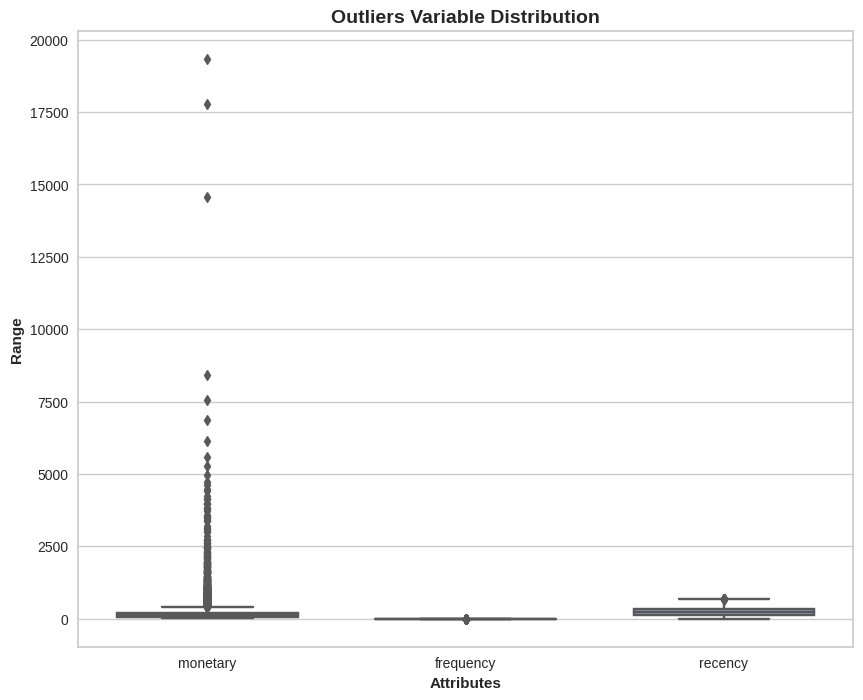

In [ ]:
attributes = ['monetary','frequency','recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm_iqr[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

**IQR**

In [ ]:
# Note for normal distribution

from pandas.core.reshape.encoding import DataFrame
# Removing (statistical) outliers for monetary 
rfm_features=['monetary'] 
def iqr_outlier (df:DataFrame,ft:list):
  for i in ft:
    Q1 = df[i].quantile(.25)
    Q3 = df[i].quantile(.75)
    IQR = Q3 - Q1
    df = df[(df[i] < Q1 - 1.5*IQR) | (df[i] > Q3 + 1.5*IQR)]
  return df

In [ ]:
rfm_i = pd.DataFrame()
rfm_i['monetary']=iqr_outlier(rfm_df_outlier, rfm_features)['monetary']
display(rfm_i)

,monetary
59863,777.00
34400,673.42
51937,791.92
57953,506.87
49906,481.30
...,...
70928,676.96
61254,817.08
84855,468.81
64500,788.76


**Z-score**

In [ ]:
rfm_zs= pd.DataFrame#rfm_df_outlier.copy()
rfm_features=['monetary']


def zscore_outliers(df:DataFrame,ft:list, threshold):

    for col in ft:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        # Identify outliers based on threshold
        outliers = pd.DataFrame(df[col][abs(z_scores) > threshold])
        # Remove from data
        #df[col] = df[col][abs(z_scores) <= threshold]
        # # Replace with the median value
        # median = df[col].median()
        # df[col] = df[col].where(abs(z_scores) <= threshold, median)

    return outliers
rfm_zs=zscore_outliers(rfm_df_outlier,rfm_features,3)
display(rfm_zs)

,monetary
7950,2009.62
30998,3013.36
57180,17786.88
18490,2136.60
52350,1767.24
...,...
13287,2429.68
74509,1966.50
34938,2274.78
52609,6142.32


**Filter outliers**

In [ ]:
iqr = rfm_i.index.tolist()
zs = rfm_zs.index.tolist()
outliers = list(set(iqr) & set(zs))
display(len(outliers))

102

# TH ko loại outlier

## Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.|
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Rescaling the attributes

rfm = rfm_df[['monetary','frequency', 'recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled.shape

(10000, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_scaled)
rfm_df_scaled.columns = ['monetary', 'frequency', 'recency']
rfm_df_scaled.head()

,monetary,frequency,recency
0,-0.335294,-0.166133,-0.777185
1,-0.106220,-0.166133,0.248069
2,-0.404586,-0.166133,1.148452
3,-0.237955,-0.166133,-0.514300
4,0.040665,-0.166133,0.517527


In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Finding the Optimal Number of Clusters

#### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

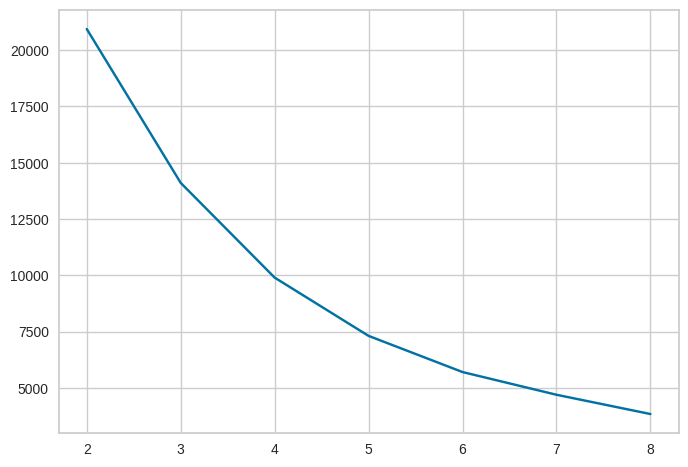

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_cluster
plt.plot(range_n_clusters, ssd)
plt.plot

Distorition score elbow để xác định số lượng cụm tối ưu

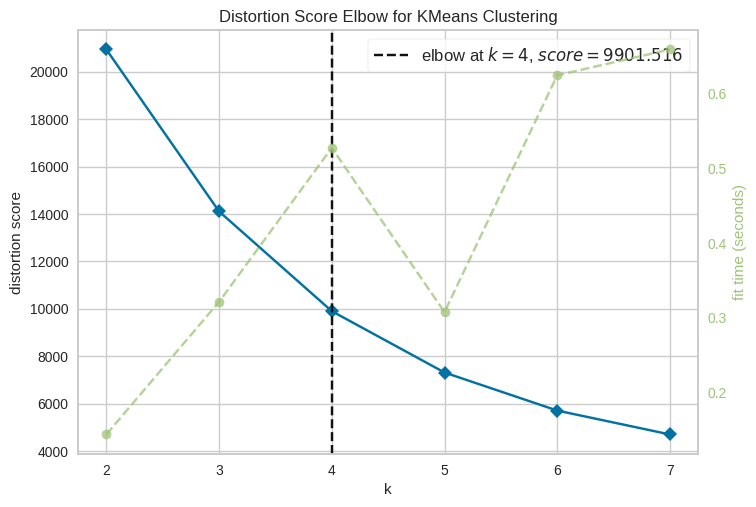

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
rfmk_means = KMeans()
elbow = KElbowVisualizer(rfmk_means, k=(2, 8))
elbow.fit(rfm_df_scaled)
elbow.show()

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.7759690577043928
For n_clusters=3, the silhouette score is 0.4991400432997557
For n_clusters=4, the silhouette score is 0.5083794258744885
For n_clusters=5, the silhouette score is 0.5174967059797264
For n_clusters=6, the silhouette score is 0.4605988538019007
For n_clusters=7, the silhouette score is 0.4837880675865372
For n_clusters=8, the silhouette score is 0.48593190830712335


##KMeans

In [ ]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
 kmeans.labels_

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
# assign the label
rfm_df['clus_kmeans'] = kmeans.labels_
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,clus_kmeans
40223,6f99b325700fdc66c8194f84fb0fa0b0,121,1,53.78,0
49303,8908bba01d8a648099e67a38eea818f9,277,1,159.47,1
29321,514f2a78d07928478ac9212b21b7acbc,414,1,21.81,1
25964,47f0359649e2dc0ea37c1c5c277b8ca8,161,1,98.69,0
73819,cced18dc0d1f0d8b16f75f5b5ec3e2fe,318,1,227.24,1


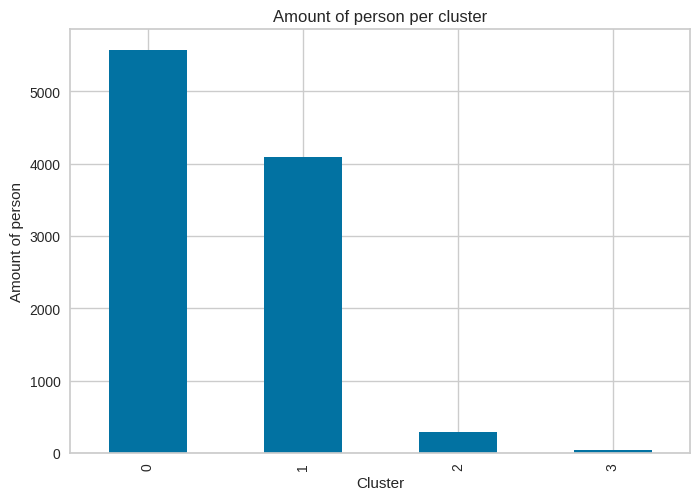

In [ ]:
rfm_df['clus_kmeans'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of person')
plt.title('Amount of person per cluster')
plt.show()

<Axes: xlabel='clus_kmeans', ylabel='monetary'>

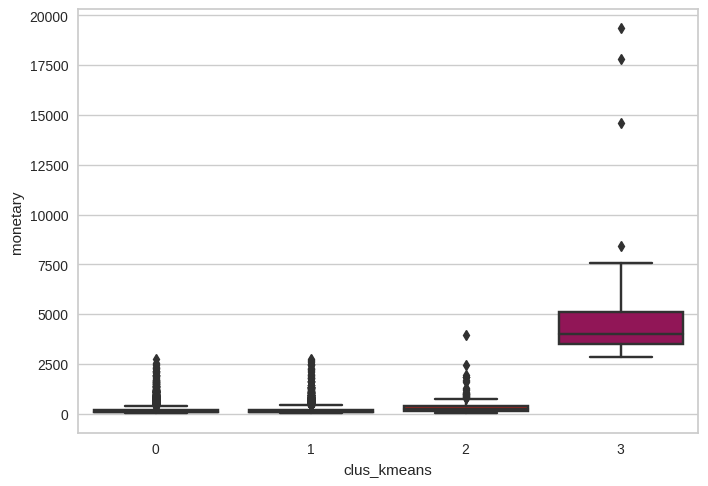

In [ ]:
# Box plot to visualize Cluster Id vs monetary

sns.boxplot(x='clus_kmeans', y='monetary', data=rfm_df)


<Axes: xlabel='clus_kmeans', ylabel='frequency'>

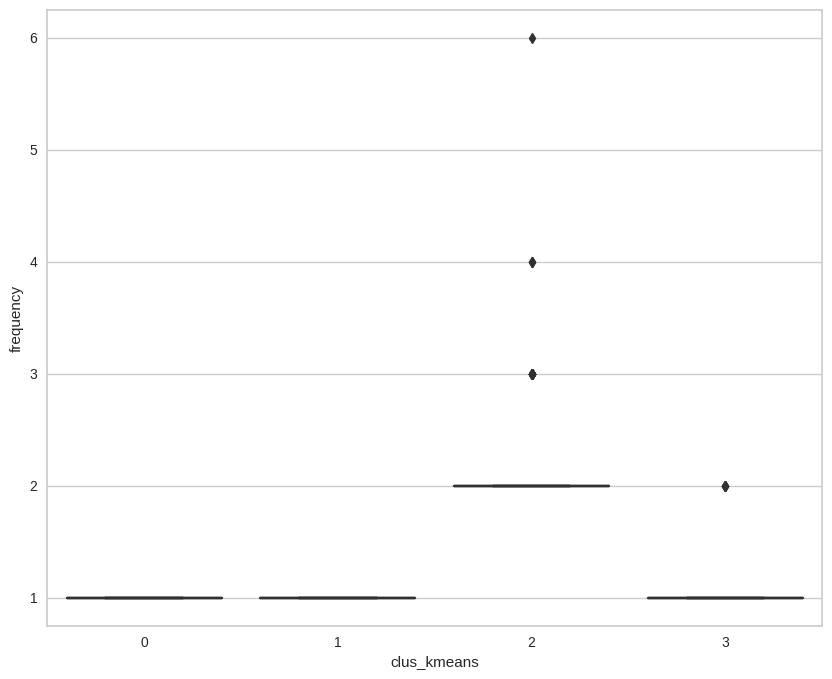

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='clus_kmeans', y='frequency', data=rfm_df)
#sns.jointplot(x='clus_kmeans',y='frequency',data=rfm_df,kind ='hist',color ='red')

<Axes: xlabel='clus_kmeans', ylabel='recency'>

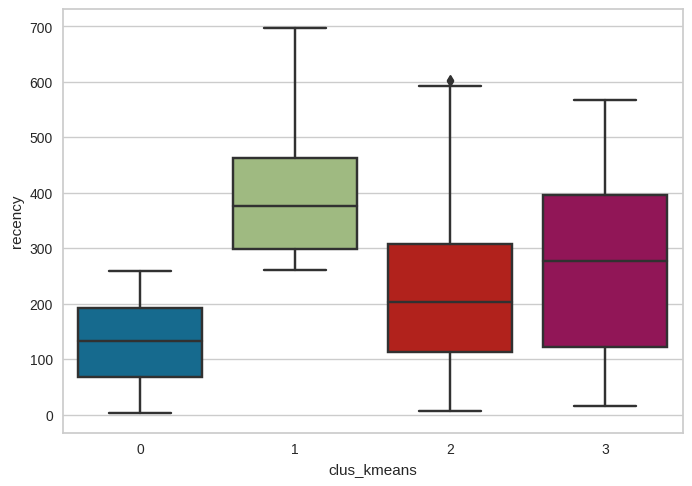

In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='clus_kmeans', y='recency', data=rfm_df)


## Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering, 
- Divisive 
- Agglomerative.

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

**Average Linkage:<br>**

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.
![](https://www.saedsayad.com/images/Clustering_average.png)

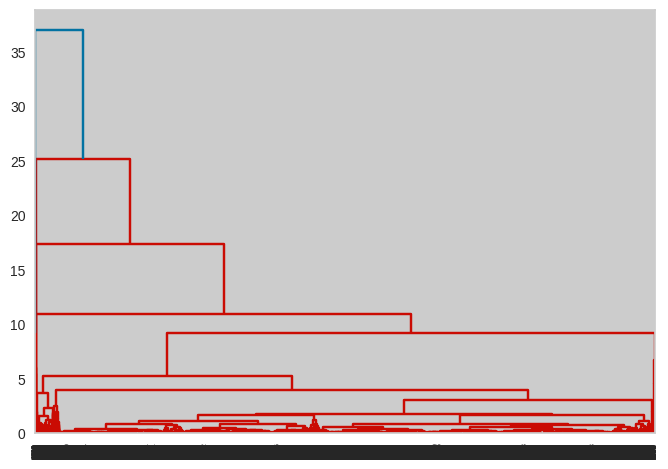

In [ ]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Cutting the Dendrogram based on K

In [ ]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Assign cluster labels

rfm_df['clus_hac'] = cluster_labels
rfm_df.head()

,customer_unique_id,recency,frequency,monetary,clus_kmeans,clus_hac
40223,6f99b325700fdc66c8194f84fb0fa0b0,121,1,53.78,0,0
49303,8908bba01d8a648099e67a38eea818f9,277,1,159.47,1,0
29321,514f2a78d07928478ac9212b21b7acbc,414,1,21.81,1,0
25964,47f0359649e2dc0ea37c1c5c277b8ca8,161,1,98.69,0,0
73819,cced18dc0d1f0d8b16f75f5b5ec3e2fe,318,1,227.24,1,0


<Axes: xlabel='clus_hac', ylabel='monetary'>

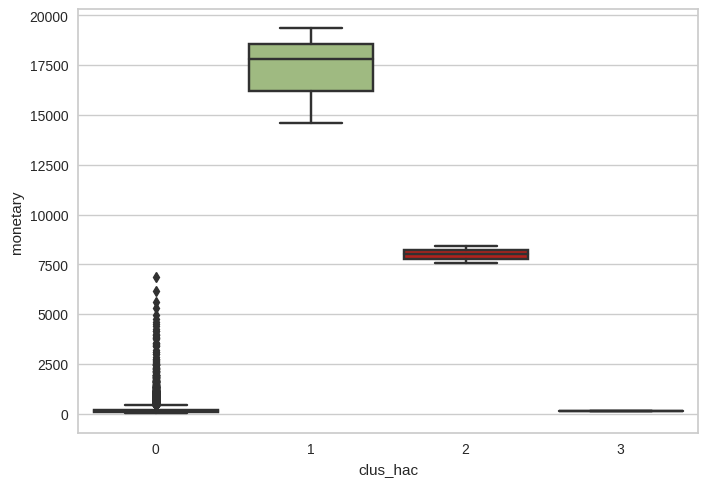

In [ ]:
# Plot Cluster Id vs Amount

sns.boxplot(x='clus_hac', y='monetary', data=rfm_df)

<Axes: xlabel='clus_hac', ylabel='frequency'>

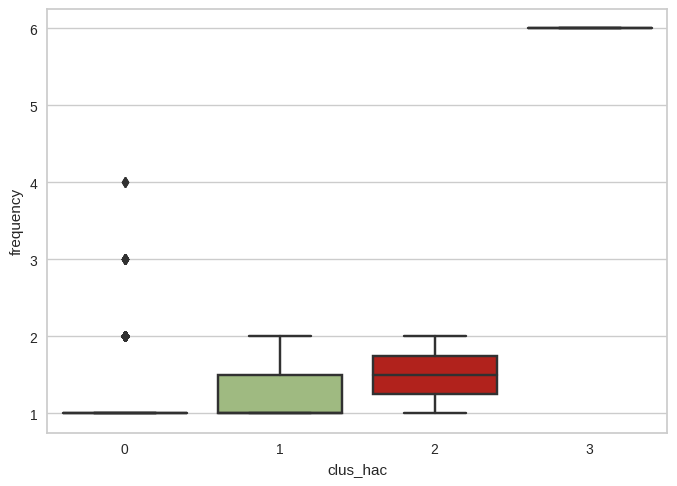

In [ ]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='clus_hac', y='frequency', data=rfm_df)

<Axes: xlabel='clus_hac', ylabel='recency'>

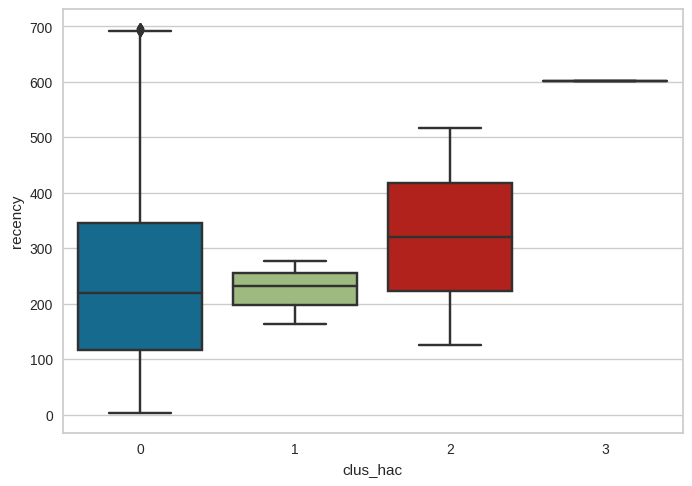

In [ ]:
# Plot Cluster Id vs Recency

sns.boxplot(x='clus_hac', y='recency', data=rfm_df)

In [ ]:
rfm_df.to_csv('rfmclus.csv', index=False)



## Học sâu Autoencoder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# Define Autoencoder model
input_dim = rfm_df_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Train Autoencoder model
autoencoder.fit(rfm_df_scaled, rfm_df_scaled, epochs=50, batch_size=32)

# Use Autoencoder to encode data
encoder = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder.predict(rfm_df_scaled)

Epoch 1/50
313/313 [==============================] - 2s 2ms/step - loss: 1.1815
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 1.0478
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.9546
Epoch 4/50
313/313 [==============================] - 0s 2ms/step - loss: 0.9021
Epoch 5/50
313/313 [==============================] - 0s 2ms/step - loss: 0.8617
Epoch 6/50
313/313 [==============================] - 0s 2ms/step - loss: 0.8297
Epoch 7/50
313/313 [==============================] - 0s 2ms/step - loss: 0.8047
Epoch 8/50
313/313 [==============================] - 0s 2ms/step - loss: 0.7849
Epoch 9/50
313/313 [==============================] - 1s 2ms/step - loss: 0.7689
Epoch 10/50
313/313 [==============================] - 0s 2ms/step - loss: 0.7555
Epoch 11/50
313/313 [==============================] - 0s 2ms/step - loss: 0.7441
Epoch 12/50
313/313 [==============================] - 0s 2ms/step - loss: 0.7341
Epoch 13/50
313/313 [====

In [ ]:


# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(encoded_data)

# Assign cluster labels to original data
rfm_df['clus_autoencoder'] = kmeans.labels_
print(rfm_df)


                     customer_unique_id  recency  frequency  monetary  \
40223  6f99b325700fdc66c8194f84fb0fa0b0      121          1     53.78   
49303  8908bba01d8a648099e67a38eea818f9      277          1    159.47   
29321  514f2a78d07928478ac9212b21b7acbc      414          1     21.81   
25964  47f0359649e2dc0ea37c1c5c277b8ca8      161          1     98.69   
73819  cced18dc0d1f0d8b16f75f5b5ec3e2fe      318          1    227.24   
...                                 ...      ...        ...       ...   
72348  c8d14082e78aa5dc1d332386f18b9547      295          1     79.16   
15976  2c58adb81726bab4f6d8836e8d6a217f      513          1     77.75   
8893   1881f0742867dc75d6e0bcc24f866710      691          1     51.05   
21423  3b619691732782773fd13a6eb1f50976      108          1     42.44   
56932  9e1f2a2653ba997e1352dc75b338211b      437          1     92.87   

       clus_kmeans  clus_hac  clus_autoencoder  
40223            0         0                 2  
49303            1       

<Axes: xlabel='clus_autoencoder', ylabel='monetary'>

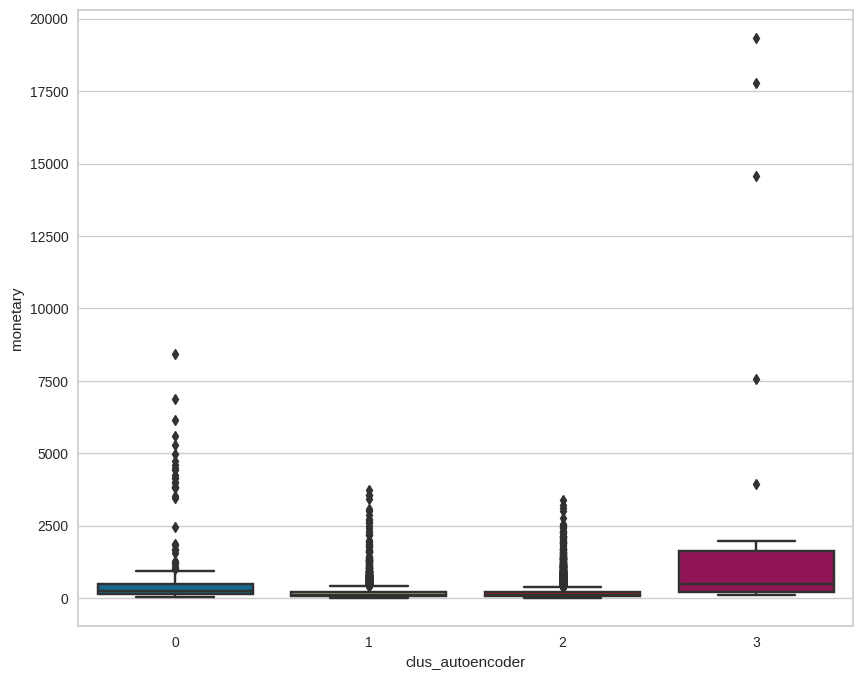

In [ ]:
# Plot Cluster Id vs Amount

sns.boxplot(x='clus_autoencoder', y='monetary', data=rfm_df)

<Axes: xlabel='clus_autoencoder', ylabel='frequency'>

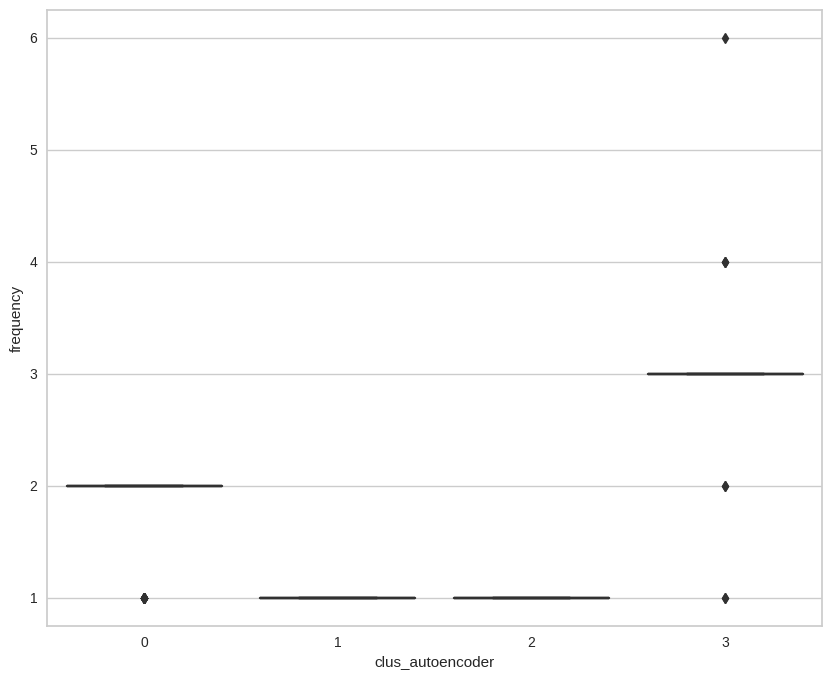

In [ ]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='clus_autoencoder', y='frequency', data=rfm_df)

<Axes: xlabel='clus_autoencoder', ylabel='recency'>

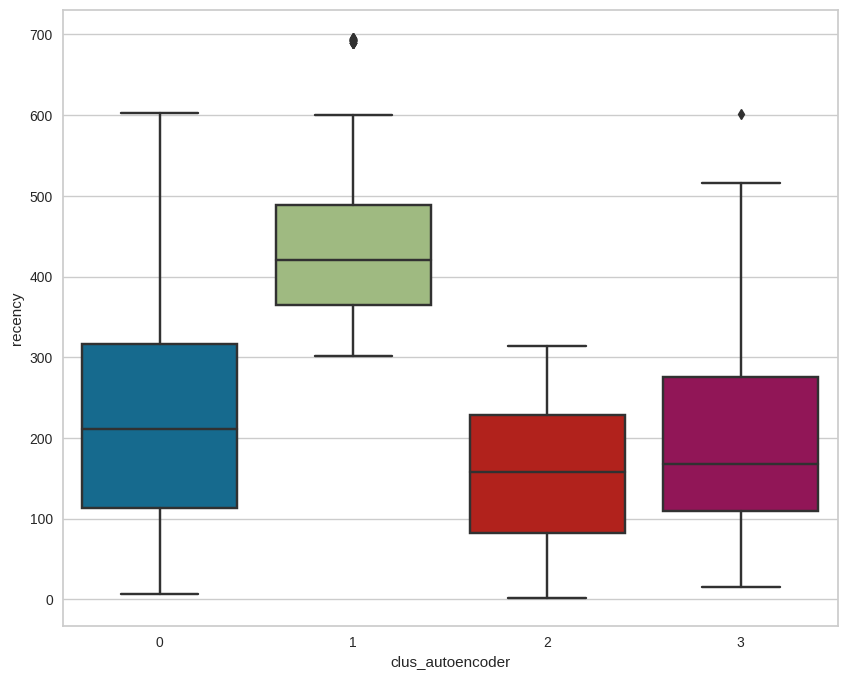

In [ ]:
# Plot Cluster Id vs Recency

sns.boxplot(x='clus_autoencoder', y='recency', data=rfm_df)

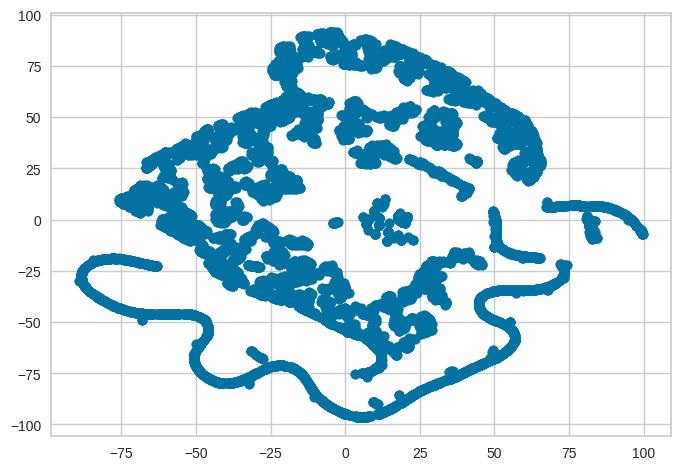

In [ ]:
# Visualize clustering using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = tsne.fit_transform(encoded_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

## Model Validation

Reconstruction Error: Lỗi tái tạo là sai số giữa dữ liệu gốc và dữ liệu tái tạo được giải mã từ mô hình. Điều này cho thấy mức độ mất mát thông tin trong quá trình mã hóa và giải mã.

Silhouette Score: Được sử dụng để đánh giá chất lượng của phân cụm. Chỉ số này có giá trị từ -1 đến 1, với giá trị gần 1 cho thấy phân cụm tốt và giá trị gần -1 cho thấy phân cụm kém.

Calinski-Harabasz Index: Một chỉ số phân cụm khác đánh giá hiệu quả của phân cụm. Giá trị càng cao cho thấy phân cụm tốt hơn

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score




In [ ]:
# Reconstruction Error
reconstruction_error = autoencoder.evaluate(rfm_df_scaled, rfm_df_scaled)

313/313 [==============================] - 1s 1ms/step - loss: 0.6750


In [ ]:
# Silhouette Score
silhouette = silhouette_score(encoded_data, kmeans.labels_)
print(silhouette)

0.64886326


In [ ]:
# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(encoded_data, kmeans.labels_)
print(calinski_harabasz)

28622.268688893484


# TH loại outlier

##Omit outliers

In [ ]:
outlier_rm = rfm_df_outlier.drop(outliers)

In [ ]:
outlier_rm

,customer_unique_id,recency,frequency,monetary
40223,6f99b325700fdc66c8194f84fb0fa0b0,121,1,53.78
49303,8908bba01d8a648099e67a38eea818f9,277,1,159.47
29321,514f2a78d07928478ac9212b21b7acbc,414,1,21.81
25964,47f0359649e2dc0ea37c1c5c277b8ca8,161,1,98.69
73819,cced18dc0d1f0d8b16f75f5b5ec3e2fe,318,1,227.24
...,...,...,...,...
72348,c8d14082e78aa5dc1d332386f18b9547,295,1,79.16
15976,2c58adb81726bab4f6d8836e8d6a217f,513,1,77.75
8893,1881f0742867dc75d6e0bcc24f866710,691,1,51.05
21423,3b619691732782773fd13a6eb1f50976,108,1,42.44


## Rescaling the Attributes

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Rescaling the attributes

rfm_df_outlier = outlier_rm[['monetary', 'frequency', 'recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_scaled_outlier = scaler.fit_transform(rfm_df_outlier)
rfm_scaled_outlier.shape

(9898, 3)

In [ ]:
rfm_df_outlier_scaled = pd.DataFrame(rfm_scaled_outlier)
rfm_df_outlier_scaled.columns = ['monetary', 'frequency', 'recency']
rfm_df_outlier_scaled.head()

,monetary,frequency,recency
0,-0.614696,-0.162998,-0.775713
1,-0.089435,-0.162998,0.250418
2,-0.773582,-0.162998,1.151571
3,-0.391501,-0.162998,-0.512602
4,0.247371,-0.162998,0.520106


##Finding the Optimal Number of Clusters

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

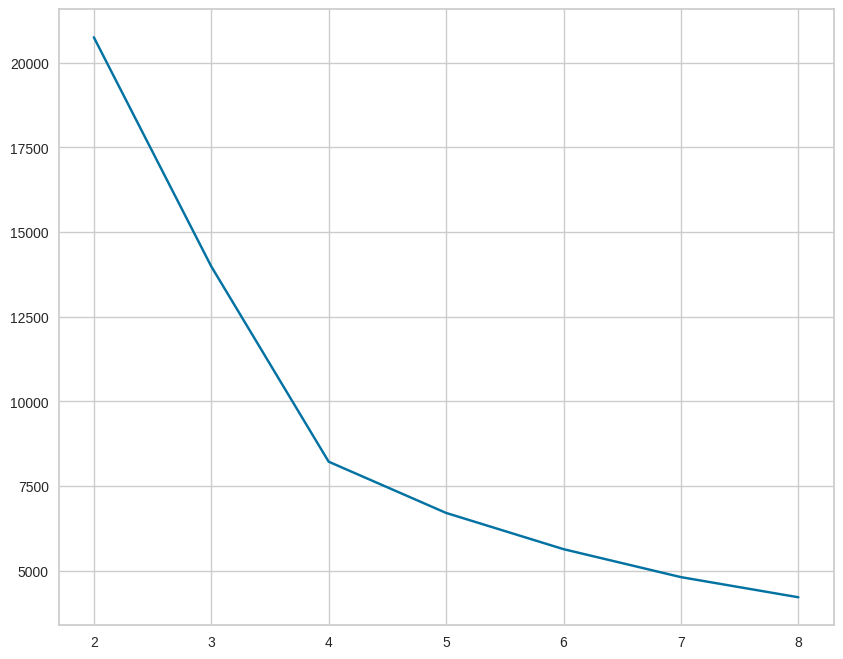

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_outlier_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)
plt.plot

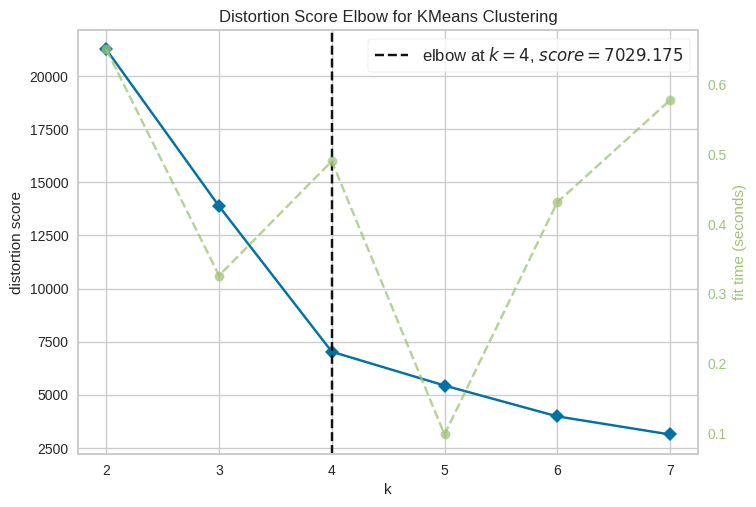

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
rfmk_means = KMeans()
elbow = KElbowVisualizer(rfmk_means, k=(2, 8))
elbow.fit(rfm_df_scaled)
elbow.show()

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_outlier_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_outlier_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.7294770005075198
For n_clusters=3, the silhouette score is 0.4172203693147236
For n_clusters=4, the silhouette score is 0.47399040074159293
For n_clusters=5, the silhouette score is 0.4070696019509307
For n_clusters=6, the silhouette score is 0.4255213750982967
For n_clusters=7, the silhouette score is 0.42730256593356236
For n_clusters=8, the silhouette score is 0.4358410066514923


##KMeans

In [ ]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_outlier_scaled)

KMeans(max_iter=50, n_clusters=4)

In [ ]:
 kmeans.labels_

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
# assign the label
outlier_rm['clus_kmeans'] = kmeans.labels_


In [ ]:
outlier_rm

,customer_unique_id,recency,frequency,monetary,clus_kmeans
40223,6f99b325700fdc66c8194f84fb0fa0b0,121,1,53.78,0
49303,8908bba01d8a648099e67a38eea818f9,277,1,159.47,1
29321,514f2a78d07928478ac9212b21b7acbc,414,1,21.81,1
25964,47f0359649e2dc0ea37c1c5c277b8ca8,161,1,98.69,0
73819,cced18dc0d1f0d8b16f75f5b5ec3e2fe,318,1,227.24,1
...,...,...,...,...,...
72348,c8d14082e78aa5dc1d332386f18b9547,295,1,79.16,1
15976,2c58adb81726bab4f6d8836e8d6a217f,513,1,77.75,1
8893,1881f0742867dc75d6e0bcc24f866710,691,1,51.05,1
21423,3b619691732782773fd13a6eb1f50976,108,1,42.44,0


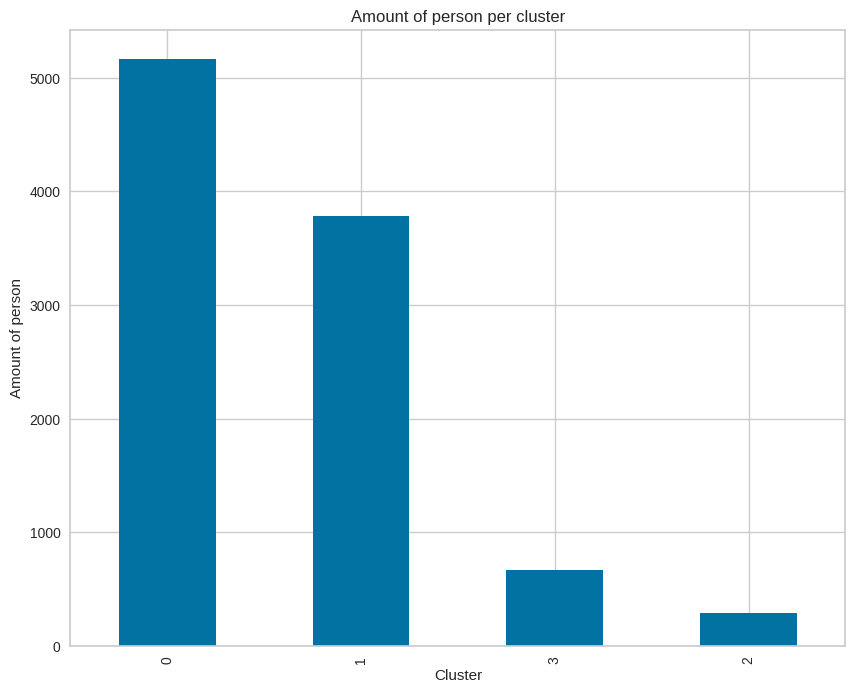

In [ ]:
outlier_rm['clus_kmeans'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of person')
plt.title('Amount of person per cluster')
plt.show()

## Hierarchical Clustering

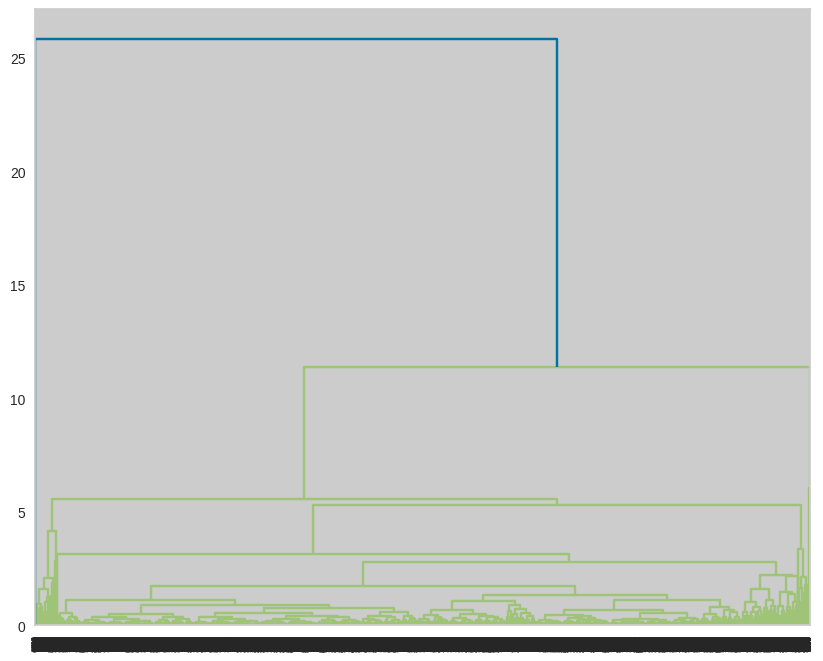

In [ ]:
# Average linkage

mergings = linkage(rfm_df_outlier_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
#4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Assign cluster labels

outlier_rm ['clus_hac'] = cluster_labels
outlier_rm .head()

,customer_unique_id,recency,frequency,monetary,clus_kmeans,clus_hac
40223,6f99b325700fdc66c8194f84fb0fa0b0,121,1,53.78,0,0
49303,8908bba01d8a648099e67a38eea818f9,277,1,159.47,1,0
29321,514f2a78d07928478ac9212b21b7acbc,414,1,21.81,1,0
25964,47f0359649e2dc0ea37c1c5c277b8ca8,161,1,98.69,0,0
73819,cced18dc0d1f0d8b16f75f5b5ec3e2fe,318,1,227.24,1,0


## Autoencoder

In [ ]:
# Define Autoencoder model
input_dim_outlier = rfm_df_outlier_scaled.shape[1]
encoding_dim_outlier = 2

input_layer_outlier = Input(shape=(input_dim_outlier,))
encoder_outlier = Dense(encoding_dim_outlier, activation='relu')(input_layer_outlier)
decoder_outlier = Dense(input_dim_outlier, activation='sigmoid')(encoder_outlier)

autoencoder_outlier = Model(inputs=input_layer_outlier, outputs=decoder_outlier)
autoencoder_outlier.compile(optimizer='adam', loss='mse')

In [ ]:
# Train Autoencoder model
autoencoder_outlier.fit(rfm_df_outlier_scaled, rfm_df_outlier_scaled, epochs=50, batch_size=32)

# Use Autoencoder to encode data
encoder_outlier = Model(inputs=input_layer_outlier, outputs=encoder_outlier)
encoded_data_outlier = encoder.predict(rfm_df_outlier_scaled)

Epoch 1/50
310/310 [==============================] - 3s 4ms/step - loss: 1.1391
Epoch 2/50
310/310 [==============================] - 1s 3ms/step - loss: 1.0167
Epoch 3/50
310/310 [==============================] - 1s 3ms/step - loss: 0.9051
Epoch 4/50
310/310 [==============================] - 1s 2ms/step - loss: 0.8388
Epoch 5/50
310/310 [==============================] - 1s 2ms/step - loss: 0.8026
Epoch 6/50
310/310 [==============================] - 1s 3ms/step - loss: 0.7726
Epoch 7/50
310/310 [==============================] - 1s 3ms/step - loss: 0.7389
Epoch 8/50
310/310 [==============================] - 1s 3ms/step - loss: 0.7175
Epoch 9/50
310/310 [==============================] - 1s 2ms/step - loss: 0.7046
Epoch 10/50
310/310 [==============================] - 1s 2ms/step - loss: 0.6958
Epoch 11/50
310/310 [==============================] - 0s 2ms/step - loss: 0.6894
Epoch 12/50
310/310 [==============================] - 0s 2ms/step - loss: 0.6844
Epoch 13/50
310/310 [====

In [ ]:
outlier_rm

,customer_unique_id,recency,frequency,monetary,clus_kmeans,clus_hac
40223,6f99b325700fdc66c8194f84fb0fa0b0,121,1,53.78,0,0
49303,8908bba01d8a648099e67a38eea818f9,277,1,159.47,1,0
29321,514f2a78d07928478ac9212b21b7acbc,414,1,21.81,1,0
25964,47f0359649e2dc0ea37c1c5c277b8ca8,161,1,98.69,0,0
73819,cced18dc0d1f0d8b16f75f5b5ec3e2fe,318,1,227.24,1,0
...,...,...,...,...,...,...
72348,c8d14082e78aa5dc1d332386f18b9547,295,1,79.16,1,0
15976,2c58adb81726bab4f6d8836e8d6a217f,513,1,77.75,1,0
8893,1881f0742867dc75d6e0bcc24f866710,691,1,51.05,1,0
21423,3b619691732782773fd13a6eb1f50976,108,1,42.44,0,0


In [ ]:

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(encoded_data_outlier)

# Assign cluster labels to original data
outlier_rm['clus_autoencoder'] = kmeans.labels_
print(outlier_rm)


                     customer_unique_id  recency  frequency  monetary  \
40223  6f99b325700fdc66c8194f84fb0fa0b0      121          1     53.78   
49303  8908bba01d8a648099e67a38eea818f9      277          1    159.47   
29321  514f2a78d07928478ac9212b21b7acbc      414          1     21.81   
25964  47f0359649e2dc0ea37c1c5c277b8ca8      161          1     98.69   
73819  cced18dc0d1f0d8b16f75f5b5ec3e2fe      318          1    227.24   
...                                 ...      ...        ...       ...   
72348  c8d14082e78aa5dc1d332386f18b9547      295          1     79.16   
15976  2c58adb81726bab4f6d8836e8d6a217f      513          1     77.75   
8893   1881f0742867dc75d6e0bcc24f866710      691          1     51.05   
21423  3b619691732782773fd13a6eb1f50976      108          1     42.44   
56932  9e1f2a2653ba997e1352dc75b338211b      437          1     92.87   

       clus_kmeans  clus_hac  clus_autoencoder  
40223            0         0                 0  
49303            1       

##Model Validation

In [ ]:
# Calinski-Harabasz Index
calinski_harabasz_outlier = calinski_harabasz_score(encoded_data_outlier, kmeans.labels_)
print(calinski_harabasz_outlier)

20423.389986575945


In [ ]:
# Reconstruction Error
reconstruction_error_outlier = autoencoder.evaluate(rfm_df_outlier_scaled, rfm_df_outlier_scaled)
reconstruction_error_outlier

310/310 [==============================] - 0s 1ms/step - loss: 0.6108


0.610761821269989

<Axes: xlabel='clus_autoencoder', ylabel='monetary'>

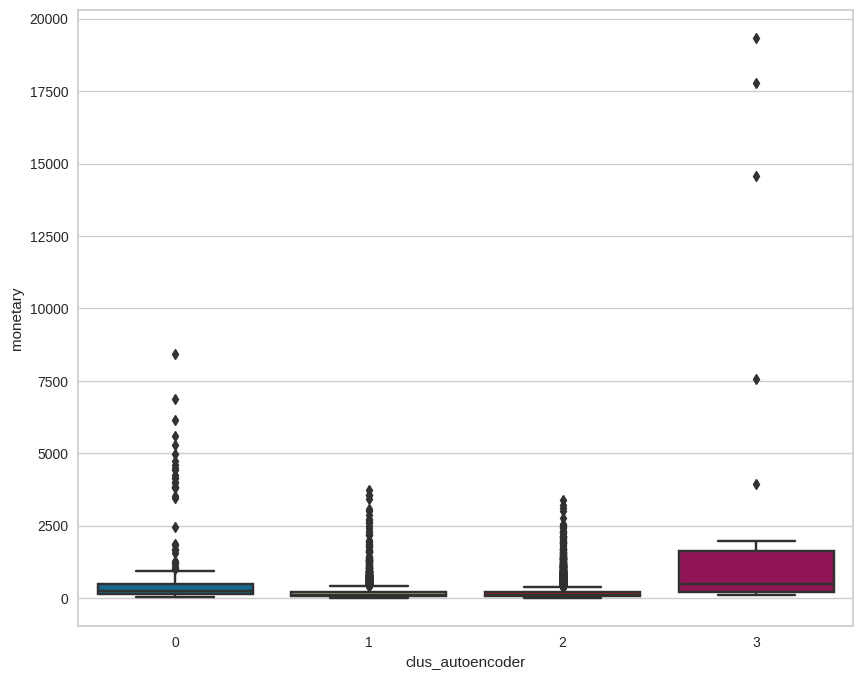

In [ ]:
# Plot Cluster Id vs Amount

sns.boxplot(x='clus_autoencoder', y='monetary', data=rfm_df)

<Axes: xlabel='clus_autoencoder', ylabel='frequency'>

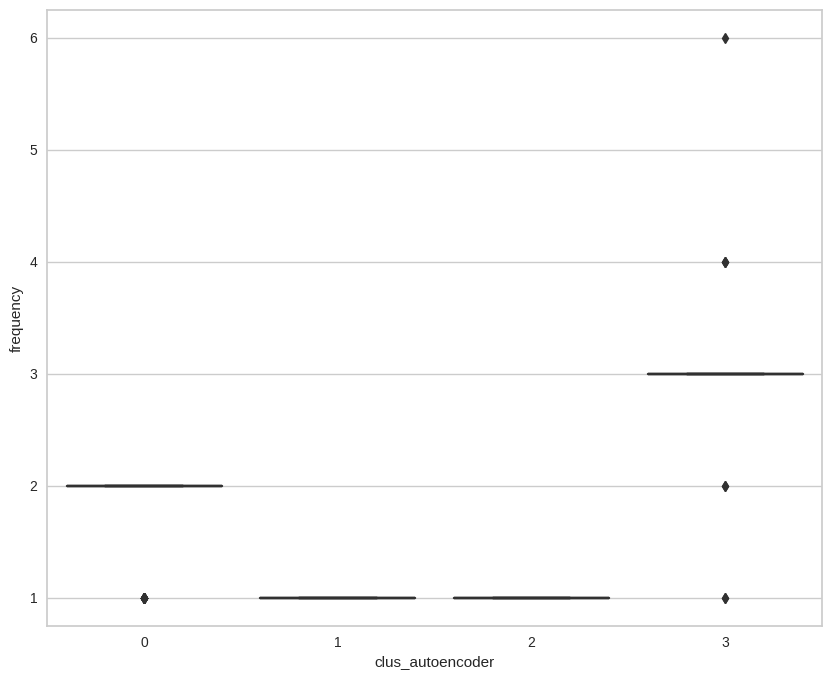

In [ ]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='clus_autoencoder', y='frequency', data=rfm_df)

<Axes: xlabel='clus_autoencoder', ylabel='recency'>

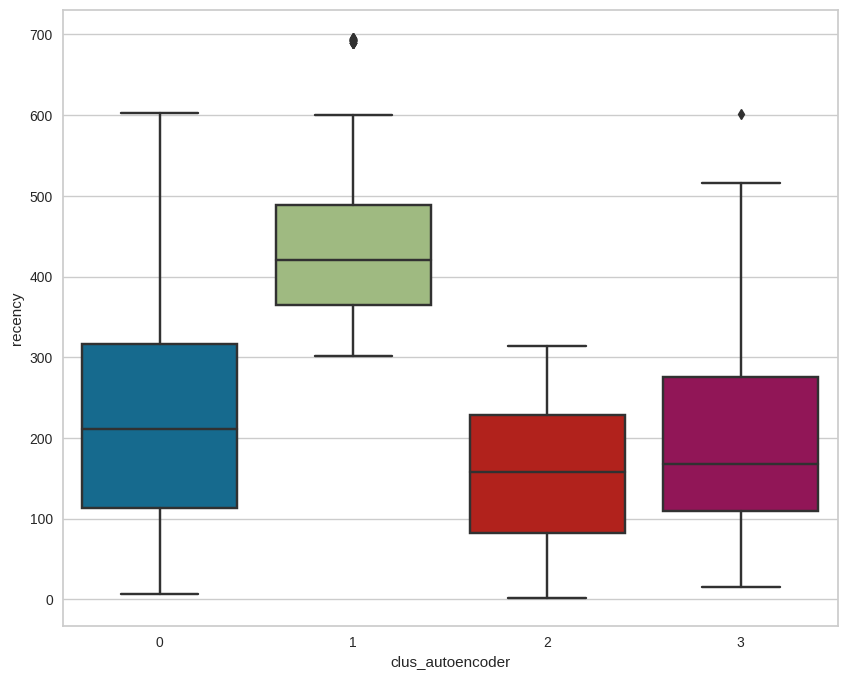

In [ ]:
# Plot Cluster Id vs Recency

sns.boxplot(x='clus_autoencoder', y='recency', data=rfm_df)

In [ ]:

# Silhouette Score
silhouette_outlier = silhouette_score(encoded_data_outlier, kmeans.labels_)
print(silhouette_outlier)

0.60043645


#Evaluate 2 circumstances

In [ ]:
arr=np.array([[reconstruction_error,silhouette,calinski_harabasz],[reconstruction_error_outlier,silhouette_outlier,calinski_harabasz_outlier]])

In [ ]:
evaluate=pd.DataFrame(arr,columns=['reconstruction_error','silhoutte','calinski_harabasz'],index=['outlier','no outlier'])

In [ ]:
print(evaluate)

            reconstruction_error  silhoutte  calinski_harabasz
outlier                 0.675017   0.648863       28622.268689
no outlier              0.610762   0.600436       20423.389987


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
evaluater=pd.read_csv('rfm_dataframe.csv')

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, fowlkes_mallows_score